## Load and Explore the Datasets

### Import Necessary Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

### Load the Datasets

In [2]:
# Load the analyst ratings dataset
analyst_ratings = pd.read_csv('../data/raw_analyst_ratings.csv')

# Load historical stock data
aapl_data = pd.read_csv('../data/yfinance_data/AAPL_historical_data.csv')
amzn_data = pd.read_csv('../data/yfinance_data/AMZN_historical_data.csv')
goog_data = pd.read_csv('../data/yfinance_data/GOOG_historical_data.csv')
meta_data = pd.read_csv('../data/yfinance_data/META_historical_data.csv')
msft_data = pd.read_csv('../data/yfinance_data/MSFT_historical_data.csv')
nvda_data = pd.read_csv('../data/yfinance_data/NVDA_historical_data.csv')
tsla_data = pd.read_csv('../data/yfinance_data/TSLA_historical_data.csv')


### Initial Data Inspection

In [3]:
analyst_ratings.shape

(1407328, 6)

In [4]:
analyst_ratings.columns

Index(['Unnamed: 0', 'headline', 'url', 'publisher', 'date', 'stock'], dtype='object')

In [5]:
analyst_ratings.head()

,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


In [6]:
analyst_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1407328 entries, 0 to 1407327
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   Unnamed: 0  1407328 non-null  int64 
 1   headline    1407328 non-null  object
 2   url         1407328 non-null  object
 3   publisher   1407328 non-null  object
 4   date        1407328 non-null  object
 5   stock       1407328 non-null  object
dtypes: int64(1), object(5)
memory usage: 64.4+ MB


In [7]:
analyst_ratings.date.describe()

count                 1407328
unique                  39957
top       2020-03-12 00:00:00
freq                     1766
Name: date, dtype: object

In [8]:
print("Analyst Ratings Data:")
print(analyst_ratings.head())

print("\nAAPL Historical Data:")
print(aapl_data.head())

Analyst Ratings Data:
   Unnamed: 0                                           headline  \
0           0            Stocks That Hit 52-Week Highs On Friday   
1           1         Stocks That Hit 52-Week Highs On Wednesday   
2           2                      71 Biggest Movers From Friday   
3           3       46 Stocks Moving In Friday's Mid-Day Session   
4           4  B of A Securities Maintains Neutral on Agilent...   

                                                 url          publisher  \
0  https://www.benzinga.com/news/20/06/16190091/s...  Benzinga Insights   
1  https://www.benzinga.com/news/20/06/16170189/s...  Benzinga Insights   
2  https://www.benzinga.com/news/20/05/16103463/7...         Lisa Levin   
3  https://www.benzinga.com/news/20/05/16095921/4...         Lisa Levin   
4  https://www.benzinga.com/news/20/05/16095304/b...         Vick Meyer   

                        date stock  
0  2020-06-05 10:30:54-04:00     A  
1  2020-06-03 10:45:20-04:00     A  
2  2020

## Descriptive Statistics and Analysis

### Basic Statistics for Textual Lengths (Analyst Ratings)

In [9]:
analyst_ratings['headline_length'] = analyst_ratings['headline'].apply(len)
print(analyst_ratings['headline_length'].describe())

count    1.407328e+06
mean     7.312051e+01
std      4.073531e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline_length, dtype: float64


In [10]:
analyst_ratings.head()

,Unnamed: 0,headline,url,publisher,date,stock,headline_length
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A,39
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A,42
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A,29
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A,44
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A,87


### Count Articles Per Publisher:

In [11]:
publisher_count = analyst_ratings['publisher'].value_counts()
print(publisher_count)

publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
                      ...  
MoneyGeek                 1
muathe                    1
Robert Morris             1
LeftCoastHedgie           1
Jeremie Capron            1
Name: count, Length: 1034, dtype: int64


### Analyze Publication Dates

In [47]:
print(analyst_ratings['date'].head(100))

0     2020-06-05 10:30:54-04:00
1     2020-06-03 10:45:20-04:00
2     2020-05-26 04:30:07-04:00
3     2020-05-22 12:45:06-04:00
4     2020-05-22 11:38:59-04:00
                ...            
95          2019-10-09 00:00:00
96          2019-10-08 00:00:00
97          2019-10-02 00:00:00
98          2019-09-05 00:00:00
99          2019-09-03 00:00:00
Name: date, Length: 100, dtype: object


In [72]:
analyst_ratings.head()

,Unnamed: 0,headline,url,publisher,date,stock,headline_length
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A,39
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A,42
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A,29
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A,44
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A,87


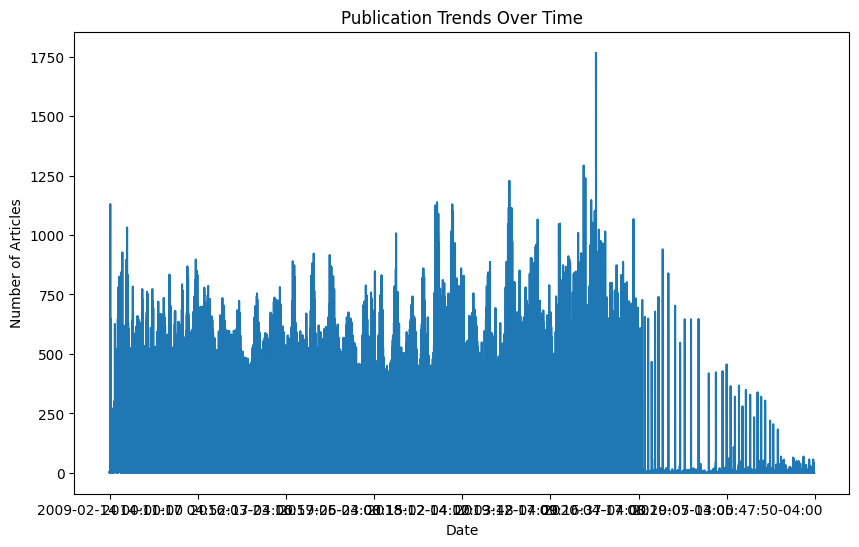

In [12]:
plt.figure(figsize=(10, 6))
publication_trends.plot()
plt.title('Publication Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.show()

## Sentiment Analysis & Topic Modeling

### Sentiment Analysis

In [13]:
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

analyst_ratings['sentiment'] = analyst_ratings['headline'].apply(lambda x: sia.polarity_scores(x)['compound'])
print(analyst_ratings[['headline', 'sentiment']].head())


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/olani/nltk_data...


                                            headline  sentiment
0            Stocks That Hit 52-Week Highs On Friday      0.000
1         Stocks That Hit 52-Week Highs On Wednesday      0.000
2                      71 Biggest Movers From Friday      0.000
3       46 Stocks Moving In Friday's Mid-Day Session      0.000
4  B of A Securities Maintains Neutral on Agilent...      0.296


### Topic Modeling

In [14]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(stop_words='english', max_features=10)
X = vectorizer.fit_transform(analyst_ratings['headline'])
common_keywords = vectorizer.get_feature_names_out()
print("Common Keywords:", common_keywords)

Common Keywords: ['earnings' 'eps' 'est' 'market' 'reports' 'sales' 'shares' 'stocks'
 'update' 'vs']


In [ ]:
from wordcloud import WordCloud

# Generate a word cloud for each topic
for topic_idx, topic in enumerate(lda.components_):
    wordcloud = WordCloud(background_color='white', max_words=20).generate_from_frequencies(dict(zip(feature_names, topic)))
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"Topic #{topic_idx + 1}")
    plt.show()


## Time Series Analysis (Stock Data)

### Examine Stock Data

In [ ]:
aapl_data['Date'] = pd.to_datetime(aapl_data['Date'])
aapl_data.set_index('Date', inplace=True)

In [ ]:
plt.figure(figsize=(10, 6))
aapl_data['Close'].plot()
plt.title('AAPL Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.show()